In [1]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [2]:
class AgentState(TypedDict):
    player_name: str
    guesses: list[int]
    number_of_attempts: int
    lower_bound: int
    upper_bound: int
    correct_number: int
    hint: str
    maximum_tries: int

In [ ]:
def setup(state: AgentState) -> AgentState:
    '''Sets up the game to start'''
    lower_bound = 0
    upper_bound = 20
    correct_number = random.randint(lower_bound, upper_bound)
    print("setup complete. correct number is ", correct_number)
    return AgentState(
        player_name= state['player_name'],
        guesses=[],
        number_of_attempts=0,
        lower_bound=lower_bound,
        upper_bound=upper_bound,
        correct_number=correct_number,
        hint="",
        maximum_tries=7,
    )

def guess(state: AgentState) -> AgentState:
    '''Doing a guess'''
    if state['hint'] == 'higher':
        state['lower_bound'] = state['guesses'][-1] + 1
    elif state['hint'] == 'lower':
        state['upper_bound'] = state['guesses'][-1] - 1
    guess = random.randint(state['lower_bound'], state['upper_bound'])
    print("guessed", guess)
    state['guesses'].append(guess)
    state['number_of_attempts'] += 1
    return state


def check_end(state: AgentState) -> str:
    '''Check whether to end game'''
    if state['guesses'][-1] == state['correct_number']:
        print("correct guess!!! Now, who's a smart agent?")
        return 'stop'
    elif state['number_of_attempts'] >= state['maximum_tries']:
        print("oops! game over!")
        return 'stop'
    print("continue guessing")
    return 'continue'

def provide_hint(state: AgentState) -> AgentState:
    '''Provide hint'''
    if state['guesses'][-1] < state['correct_number']:
        print("hint higher")
        state['hint'] = 'higher'
    else:
        print("hint lower")
        state['hint'] = 'lower'
    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint", provide_hint)

graph.add_edge("setup", "guess")
graph.add_edge("hint", "guess")
graph.add_conditional_edges(
    "guess",
    check_end,
    {
        "stop": END,
        "continue": "hint"
    }
)
graph.set_entry_point("setup")
app = graph.compile()

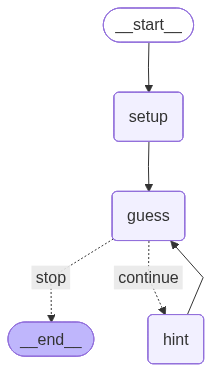

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial = AgentState(
        player_name= "The Smart Bot",
        guesses=[],
        number_of_attempts=0,
        lower_bound=0,
        upper_bound=20,
        correct_number=0,
        hint="",
        maximum_tries=7,
    )
result = app.invoke(initial)
print(result)


setup complete. correct number is  9
guessed 8
continue guessing
hint higher
guessed 20
continue guessing
hint lower
guessed 19
continue guessing
hint lower
guessed 12
continue guessing
hint lower
guessed 10
continue guessing
hint lower
guessed 9
correct guess!!! Now, who's a smart agent?
{'player_name': 'The Smart Bot', 'guesses': [8, 20, 19, 12, 10, 9], 'number_of_attempts': 6, 'lower_bound': 9, 'upper_bound': 9, 'correct_number': 9, 'hint': 'lower', 'maximum_tries': 7}
